# Ch4 - 3. 기초 통계 함수

## 기초통계함수
다양한 기초 통계 함수는 DataFrame 과 Series에 대해 모두 정의되어 있다.

> sum : 합계
mean : 평균  
std : 표준편차  
var : 분산  
quantile : 사분위수  
min : 최소값  
max : 최대값  

`axis`를 설정해서 행별 혹은열별 기초 통계를 구할 수 있다.  

## axis 키워드
넘파이 및 판다스의 많은 함수에 사용되는 키워드로, 연산 등을 수행할 때 축의 방향을 결정하는 역할을 한다.  

0이면 행을, 1이면 열을 나타내지만 이렇게 기억하면 논리적으로 이상한 점이 존재할 수 있다.  

> `sum(axis = 0)` : 열 기준 합
열 기준으로 모든 행의 합이 계산된다. (열 단위로 행의 합)  

> `concat([df1, df2], axis = 0)` : 행 단위 병합  

이 이유는 그 함수의 결과 구조가 벡터 형태(1차원)인지, 행렬 형태(2차원)인지에 따라 그 역할이 조금씩 다르다.  
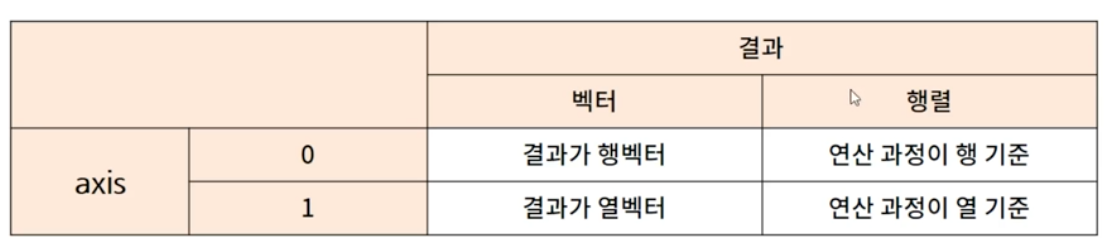
_출처 ch4. 한눈에 데이터 보기-데이터 통합 및 집계 -03. 기초 통계함수를 활용한 데이터 집계_  

만약 `sum(axis = 0)` 경우 결과가 벡터 형태이기 때문에 해당 결과가 나오는 것을 상상하고 사용하도록 한다.  

## DataFrame.describe 함수

열별로 대표적인 기초 통계를 반환한다.  
(count, mean, std, min, 25%, 50%, 75%, max)

count는 결측을 제외한 데이터의 개수를 반환한다.  

In [1]:
import os
import pandas as pd
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/1. 데이터 핸들링/데이터")

##### 오류가 뜬다.  
`'utf-8' codec can't decode byte 0xbc in position 0: invalid start byte`  
그렇기에 cp949 로 인코딩을 시도했다. 

In [2]:
df = pd.read_csv('온라인_판매기록.csv', encoding = 'cp949')

In [3]:
df

,쇼핑몰,제품,수량,판매금액,쇼핑몰 유형
0,쿠팡,제품_16,8,1134400,쿠팡
1,쿠팡,제품_57,8,439200,쿠팡
2,쿠팡,제품_25,4,495200,쿠팡
3,쿠팡,제품_18,4,578000,쿠팡
4,쿠팡,제품_90,2,75000,쿠팡
...,...,...,...,...,...
5810,애견아우랫,제품_41,5,696500,동물병원
5811,애견아우랫,제품_98,6,590400,동물병원
5812,애견아우랫,제품_77,5,512500,동물병원
5813,애견아우랫,제품_04,6,256200,동물병원


In [4]:
df.head()

,쇼핑몰,제품,수량,판매금액,쇼핑몰 유형
0,쿠팡,제품_16,8,1134400,쿠팡
1,쿠팡,제품_57,8,439200,쿠팡
2,쿠팡,제품_25,4,495200,쿠팡
3,쿠팡,제품_18,4,578000,쿠팡
4,쿠팡,제품_90,2,75000,쿠팡


### 평균과 백분위수 확인

In [5]:
# 평균
df[['수량', '판매금액']].mean()

수량           5.502837
판매금액    448851.831470
dtype: float64

In [6]:
# 백분위 중 상위 10% - 값이 오름차순이기 때문에 100%가 최대값
df[['수량', '판매금액']].quantile(0.1)

수량          2.0
판매금액    79700.0
Name: 0.1, dtype: float64

### 분포통계량(사분위수와 중앙값, 최소 최대값) 확인

데이터 전처리에 대한 아이디어를 얻기 위한 확인.  

In [7]:
df[['수량', '판매금액']].describe()

,수량,판매금액
count,5815.000000,5.815000e+03
mean,5.502837,4.488518e+05
std,2.867373,3.491219e+05
min,1.000000,1.010000e+04
25%,3.000000,1.528000e+05
50%,6.000000,3.584000e+05
75%,8.000000,6.678000e+05
max,10.000000,1.533000e+06
